## 核方法的必要性
升到高维空间线性可分

In [1]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

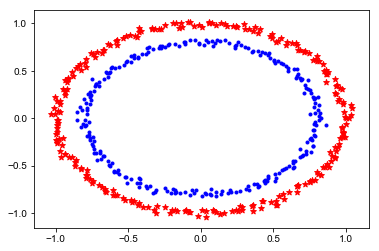

In [2]:
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 
  
# generating data 
X, Y = make_circles(n_samples = 500, noise = 0.02) 

idx_0 = np.where(Y == 0)
idx_1 = np.where(Y == 1)
X_0 = X[idx_0]
X_1 = X[idx_1]

# visualizing data 
#plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.scatter(X_0[:, 0], X_0[:, 1], c = 'r', marker = '*') 
plt.scatter(X_1[:, 0], X_1[:, 1], c = 'b', marker = '.') 
plt.show() 

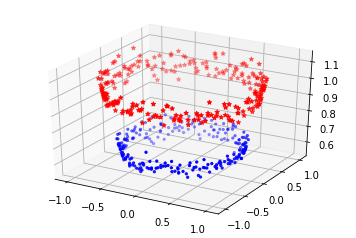

In [20]:
# adding a new dimension to X 
X1_0 = X_0[:, 0].reshape((-1, 1)) 
X2_0 = X_0[:, 1].reshape((-1, 1)) 
X3_0 = (X1_0**2 + X2_0**2) 
X_0 = np.hstack((X_0, X3_0)) 

X1_1 = X_1[:, 0].reshape((-1, 1)) 
X2_1 = X_1[:, 1].reshape((-1, 1)) 
X3_1 = (X1_1**2 + X2_1**2) 
X_1 = np.hstack((X_1, X1_0)) 
  
# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
#axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
axes.scatter(X1_0, X2_0, X1_0**2 + X2_0**2, c = 'r', marker = '*', depthshade = True)
axes.scatter(X1_1, X2_1, X1_1**2 + X2_1**2, c = 'b', marker = '.', depthshade = True) 
plt.show() 

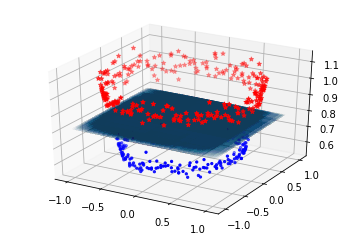

In [21]:
# create support vector classifier using a linear kernel 
from sklearn import svm 
  
# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X_3D = np.hstack((X, X3)) 

svc = svm.SVC(kernel = 'linear') 
svc.fit(X_3D, Y) 
w = svc.coef_ 
b = svc.intercept_ 
  
# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 
  
fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
#axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
#axes2.scatter(X1[idx_0], X2[idx_0], X1[idx_0]**2 + X2[idx_0]**2, c = 'r', marker = '*', depthshade = True) 
#axes2.scatter(X1[idx_1], X2[idx_1], X1[idx_1]**2 + X2[idx_1]**2, c = 'b', marker = '*', depthshade = True) 
axes2.scatter(X1_0, X2_0, X1_0**2 + X2_0**2, c = 'r', marker = '*', depthshade = True)
axes2.scatter(X1_1, X2_1, X1_1**2 + X2_1**2, c = 'b', marker = '.', depthshade = True) 

axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 

In [23]:
points = np.random.randn(n_points, j)
    
dist = np.linalg.norm(points, axis=0)

In [25]:
dist.shape

(499,)

## 高维空间中最近邻的距离

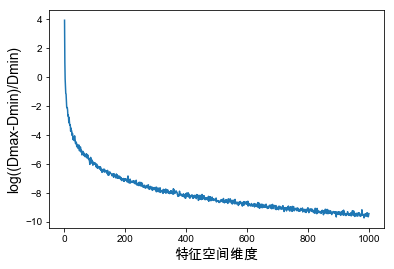

In [60]:
dim = range(1, 1000)
ratio = np.zeros(len(dim))

for j in range(1, 1000):
    n_points = 500
    points = np.random.randn(n_points, j)
    
    dist = np.linalg.norm(points, axis=1)
    dist = np.sqrt(dist)
    Dmin = dist.min()
    Dmax = dist.max()
    
    #ratio[j-1] = -np.log((Dmax-Dmin)/Dmin)
    ratio[j-1] =np.log((Dmax-Dmin)/(Dmin*j))
    
plt.plot(dim, ratio)
plt.xlabel(u'特征空间维度', fontsize = 14)
plt.ylabel('log((Dmax-Dmin)/Dmin)', fontsize = 14)
plt.show()

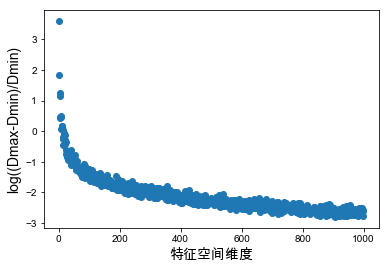

In [58]:
plt.scatter(dim, ratio)
plt.xlabel(u'特征空间维度', fontsize = 14)
plt.ylabel('log((Dmax-Dmin)/Dmin)', fontsize = 14)
plt.show()